## Let me read the data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns
from xgboost import XGBRegressor, XGBRFRegressor, plot_importance, plot_tree
from scipy import stats
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,...,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,...,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,...,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,...,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,...,1,A122,32,A143,A152,1,A173,2,A192,A201


In [4]:
sample_submission_df = pd.read_csv('sample.csv')
sample_submission_df.head()

,S.no,credit_amount
0,1,1651
1,2,636
2,3,829
3,4,870
4,5,1698


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebe3870208>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebe3870b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebe3870080>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebe3880438>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebe3880898>],
 'means': []}

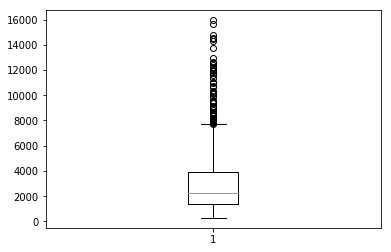

In [6]:
plt.boxplot(train_df['credit_amount'])

## We have many outliers for credit amount

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebe3906a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebe390f438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebe3906908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebe390fcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebe3916198>],
 'means': []}

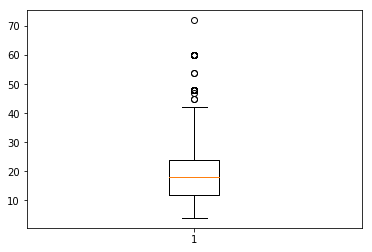

In [7]:
plt.boxplot(train_df['duration_month'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebe396f7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebe3977198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebe396f668>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebe3977a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebe3977eb8>],
 'means': []}

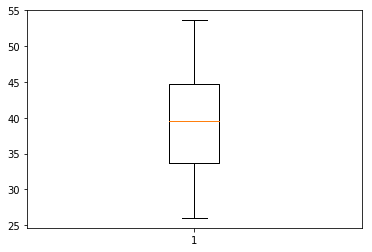

In [8]:
plt.boxplot(train_df['investment'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebe39db128>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebe39dbac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebe39d0f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebe39e13c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebe39e1828>],
 'means': []}

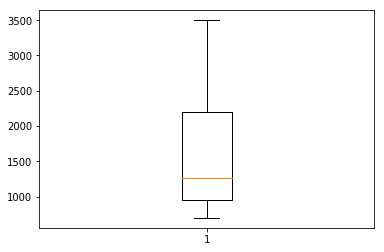

In [9]:
plt.boxplot(train_df['Salary'])

In [10]:
null_vals = pd.DataFrame(round ( 100 * (train_df.isnull().sum() / len(train_df.index)), 3))
null_vals.columns = ['% null values']
null_vals

,% null values
serial number,0.000
account_info,39.000
duration_month,0.000
Loan,0.000
Regularity,0.000
Purpose,0.000
credit_amount,0.000
savings_account,0.000
Saving Account,17.143
employment_st,0.000


In [11]:
null_vals_test = pd.DataFrame(round ( 100 * (test_df.isnull().sum() / len(test_df.index)), 3))
null_vals_test.columns = ['% null values']
null_vals_test

,% null values
serial number,0.000
account_info,40.333
duration_month,0.000
Loan,0.000
Regularity,0.000
Purpose,0.000
savings_account,0.000
Saving Account,21.000
employment_st,0.000
Salary,0.000


In [12]:
train_df[['account_info', 'Saving Account']].head(15)

,account_info,Saving Account
0,BRONZE,NaN
1,SILVER,72.0
2,NaN,68.0
3,BRONZE,73.0
4,BRONZE,52.0
5,NaN,NaN
6,NaN,990.0
7,SILVER,98.0
8,NaN,2641.0
9,SILVER,14.0


In [13]:
test_df[['account_info', 'Saving Account']].head(15)

,account_info,Saving Account
0,NaN,517.0
1,BRONZE,18.0
2,GOLD,389.0
3,SILVER,326.0
4,SILVER,16.0
5,NaN,836.0
6,SILVER,394.0
7,SILVER,73.0
8,SILVER,21.0
9,SILVER,61.0


## Let me replace account_info null values by N_A and Saving Account Null value by 0


In [14]:
train_df['account_info'].fillna('N_A', inplace=True)
train_df['Saving Account'].fillna('0', inplace=True)

test_df['Saving Account'].fillna('0', inplace=True)
test_df['account_info'].fillna('N_A', inplace=True)

In [15]:
test_df[['account_info', 'Saving Account']].head(20)

,account_info,Saving Account
0,N_A,517
1,BRONZE,18
2,GOLD,389
3,SILVER,326
4,SILVER,16
5,N_A,836
6,SILVER,394
7,SILVER,73
8,SILVER,21
9,SILVER,61


In [16]:
null_vals = pd.DataFrame(round ( 100 * (train_df.isnull().sum() / len(train_df.index)), 3))
null_vals.columns = ['% null values']
null_vals

,% null values
serial number,0.0
account_info,0.0
duration_month,0.0
Loan,0.0
Regularity,0.0
Purpose,0.0
credit_amount,0.0
savings_account,0.0
Saving Account,0.0
employment_st,0.0


In [17]:
null_vals_test = pd.DataFrame(round ( 100 * (test_df.isnull().sum() / len(test_df.index)), 3))
null_vals_test.columns = ['% null values']
null_vals_test

,% null values
serial number,0.0
account_info,0.0
duration_month,0.0
Loan,0.0
Regularity,0.0
Purpose,0.0
savings_account,0.0
Saving Account,0.0
employment_st,0.0
Salary,0.0


In [18]:
## I am planning to use XGBoost which mostly should take care of the outliers so also we dont need to do scaling

## Feature Engineering
### Let me add Salary/liabilities, investment/age and salary/(age-25).
### Dividing by train_df['liables']+1 as there is a chance that 

In [20]:
train_df['sal_per_liablity'] = train_df['Salary']/(train_df['liables']+1)
train_df['sal_by_experience'] = train_df['Salary']/train_df['age']
train_df['duration_by_age'] = (train_df['duration_month']/12)/train_df['age']

test_df['sal_per_liablity'] = test_df['Salary']/(test_df['liables']+1)
test_df['sal_by_experience'] = test_df['Salary']/test_df['age']
test_df['duration_by_age'] = (test_df['duration_month']/12)/test_df['age']

## Time for some EDA

In [21]:
train_df['Saving Account'] = pd.to_numeric(train_df['Saving Account'], errors='coerce')
test_df['Saving Account'] = pd.to_numeric(test_df['Saving Account'], errors='coerce')
numeric_cols = train_df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

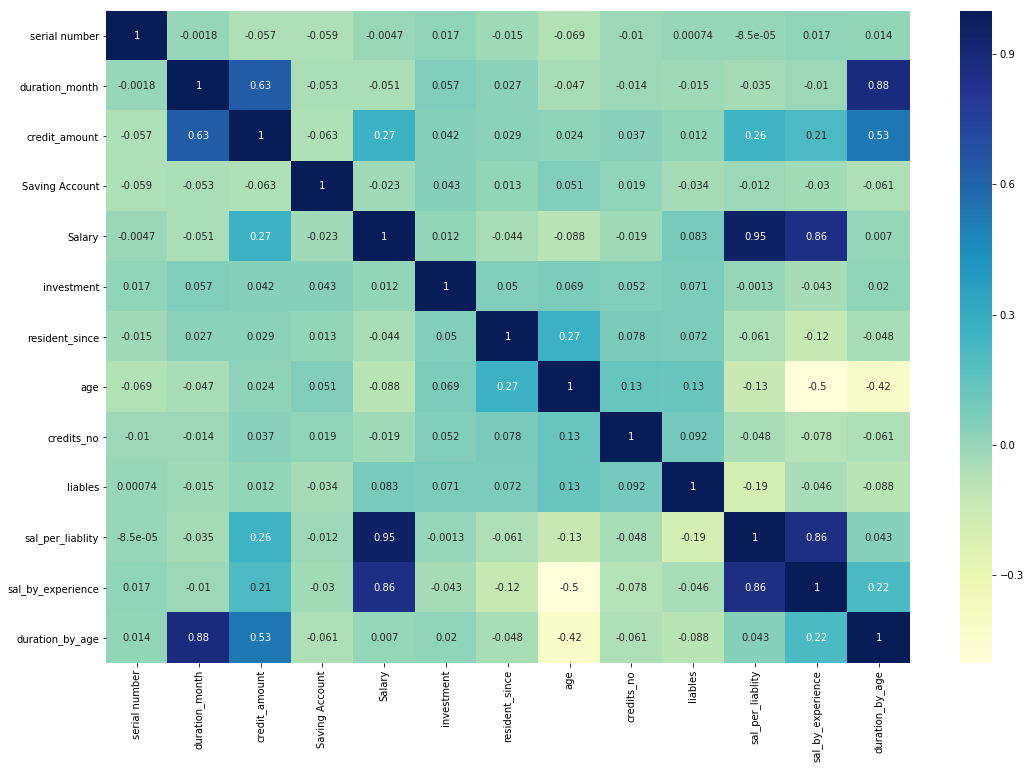

In [22]:
#creating a heatmap of the attributes in the dataset
correlation_matrix = train_df[numeric_cols].corr()
plt.figure(figsize=(18, 12))

sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [23]:
print(categorical_cols)

['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account', 'employment_st', 'Gender', 'Status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type', 'telephone', 'foreigner']


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 28 columns):
serial number        700 non-null int64
account_info         700 non-null object
duration_month       700 non-null int64
Loan                 700 non-null object
Regularity           700 non-null object
Purpose              700 non-null object
credit_amount        700 non-null int64
savings_account      700 non-null object
Saving Account       700 non-null float64
employment_st        700 non-null object
Salary               700 non-null int64
investment           700 non-null float64
Gender               700 non-null object
Status               700 non-null object
gurantors            700 non-null object
resident_since       700 non-null int64
property_type        700 non-null object
age                  700 non-null int64
installment_type     700 non-null object
housing_type         700 non-null object
credits_no           700 non-null int64
job_type             700 non-null objec

In [25]:
test_df.head(20)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,1,N_A,12,YES,YES,A40,A63,517.0,A73,1134,...,A143,A151,1,A172,1,A191,A201,567.000000,39.103448,0.034483
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,...,A143,A153,2,A173,1,A192,A201,391.500000,17.021739,0.086957
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,...,A143,A153,1,A173,1,A192,A201,590.500000,25.127660,0.042553
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,...,A142,A152,2,A173,1,A191,A201,426.500000,20.804878,0.060976
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,...,A143,A152,1,A173,2,A192,A201,296.000000,27.750000,0.070312
5,6,N_A,15,YES,YES,A40,A63,836.0,A75,2745,...,A143,A153,1,A173,1,A191,A201,1372.500000,78.428571,0.035714
6,7,SILVER,48,YES,YES,A40,A62,394.0,A74,1551,...,A143,A152,1,A173,1,A191,A201,775.500000,64.625000,0.166667
7,8,SILVER,12,NO,YES,A40,A61,73.0,A72,1128,...,A143,A151,2,A173,1,A191,A201,564.000000,45.120000,0.040000
8,9,SILVER,9,YES,YES,A40,A61,21.0,A75,876,...,A143,A152,1,A173,1,A191,A201,438.000000,35.040000,0.030000
9,10,SILVER,9,YES,YES,A40,A61,61.0,A73,2181,...,A143,A152,1,A172,2,A191,A201,727.000000,58.945946,0.020270


In [26]:
train_df.head(20)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,1,BRONZE,6,YES,NO,A40,1169,A65,0.0,A75,...,A143,A152,2,A173,1,A192,A201,426.000000,12.716418,0.007463
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,...,A143,A152,1,A173,1,A191,A201,1200.000000,109.090909,0.181818
2,3,N_A,12,YES,NO,A46,2096,A61,68.0,A74,...,A143,A152,1,A172,2,A191,A201,692.666667,42.408163,0.020408
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,...,A143,A153,1,A173,2,A191,A201,793.333333,52.888889,0.077778
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,...,A143,A153,2,A173,2,A191,A201,585.333333,33.132075,0.037736
5,6,N_A,36,YES,YES,A46,9055,A65,0.0,A73,...,A143,A153,1,A172,2,A192,A201,787.666667,67.514286,0.085714
6,7,N_A,24,YES,YES,A40,2835,A63,990.0,A75,...,A143,A152,1,A173,1,A191,A201,783.500000,29.566038,0.037736
7,8,SILVER,36,YES,YES,A40,6948,A61,98.0,A73,...,A143,A151,1,A174,1,A192,A201,1152.500000,65.857143,0.085714
8,9,N_A,12,YES,YES,A40,3059,A64,2641.0,A74,...,A143,A152,1,A172,1,A191,A201,945.500000,31.000000,0.016393
9,10,SILVER,30,YES,NO,A40,5234,A61,14.0,A71,...,A143,A152,2,A174,1,A191,A201,482.000000,34.428571,0.089286


In [27]:
for cat_column in categorical_cols: 
    print(cat_column)    
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(train_df[cat_column])
    encoded_col_val = label_encoder.transform(train_df[cat_column])
    train_df[cat_column] = encoded_col_val
    
train_df.head()

account_info
Loan
Regularity
Purpose
savings_account
employment_st
Gender
Status
gurantors
property_type
installment_type
housing_type
job_type
telephone
foreigner


,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,1,0,6,1,0,0,1169,4,0.0,4,...,2,1,2,2,1,1,0,426.000000,12.716418,0.007463
1,2,3,48,1,1,0,5951,0,72.0,2,...,2,1,1,2,1,0,0,1200.000000,109.090909,0.181818
2,3,2,12,1,0,2,2096,0,68.0,3,...,2,1,1,1,2,0,0,692.666667,42.408163,0.020408
3,4,0,42,1,1,0,7882,0,73.0,3,...,2,2,1,2,2,0,0,793.333333,52.888889,0.077778
4,5,0,24,1,0,0,4870,0,52.0,2,...,2,2,2,2,2,0,0,585.333333,33.132075,0.037736


In [28]:
for cat_column in categorical_cols: 
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(test_df[cat_column])
    encoded_col_val = label_encoder.transform(test_df[cat_column])
    test_df[cat_column] = encoded_col_val
    
train_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,1,0,6,1,0,0,1169,4,0.0,4,...,2,1,2,2,1,1,0,426.000000,12.716418,0.007463
1,2,3,48,1,1,0,5951,0,72.0,2,...,2,1,1,2,1,0,0,1200.000000,109.090909,0.181818
2,3,2,12,1,0,2,2096,0,68.0,3,...,2,1,1,1,2,0,0,692.666667,42.408163,0.020408
3,4,0,42,1,1,0,7882,0,73.0,3,...,2,2,1,2,2,0,0,793.333333,52.888889,0.077778
4,5,0,24,1,0,0,4870,0,52.0,2,...,2,2,2,2,2,0,0,585.333333,33.132075,0.037736


## Pairplots to check the relationship between the variables

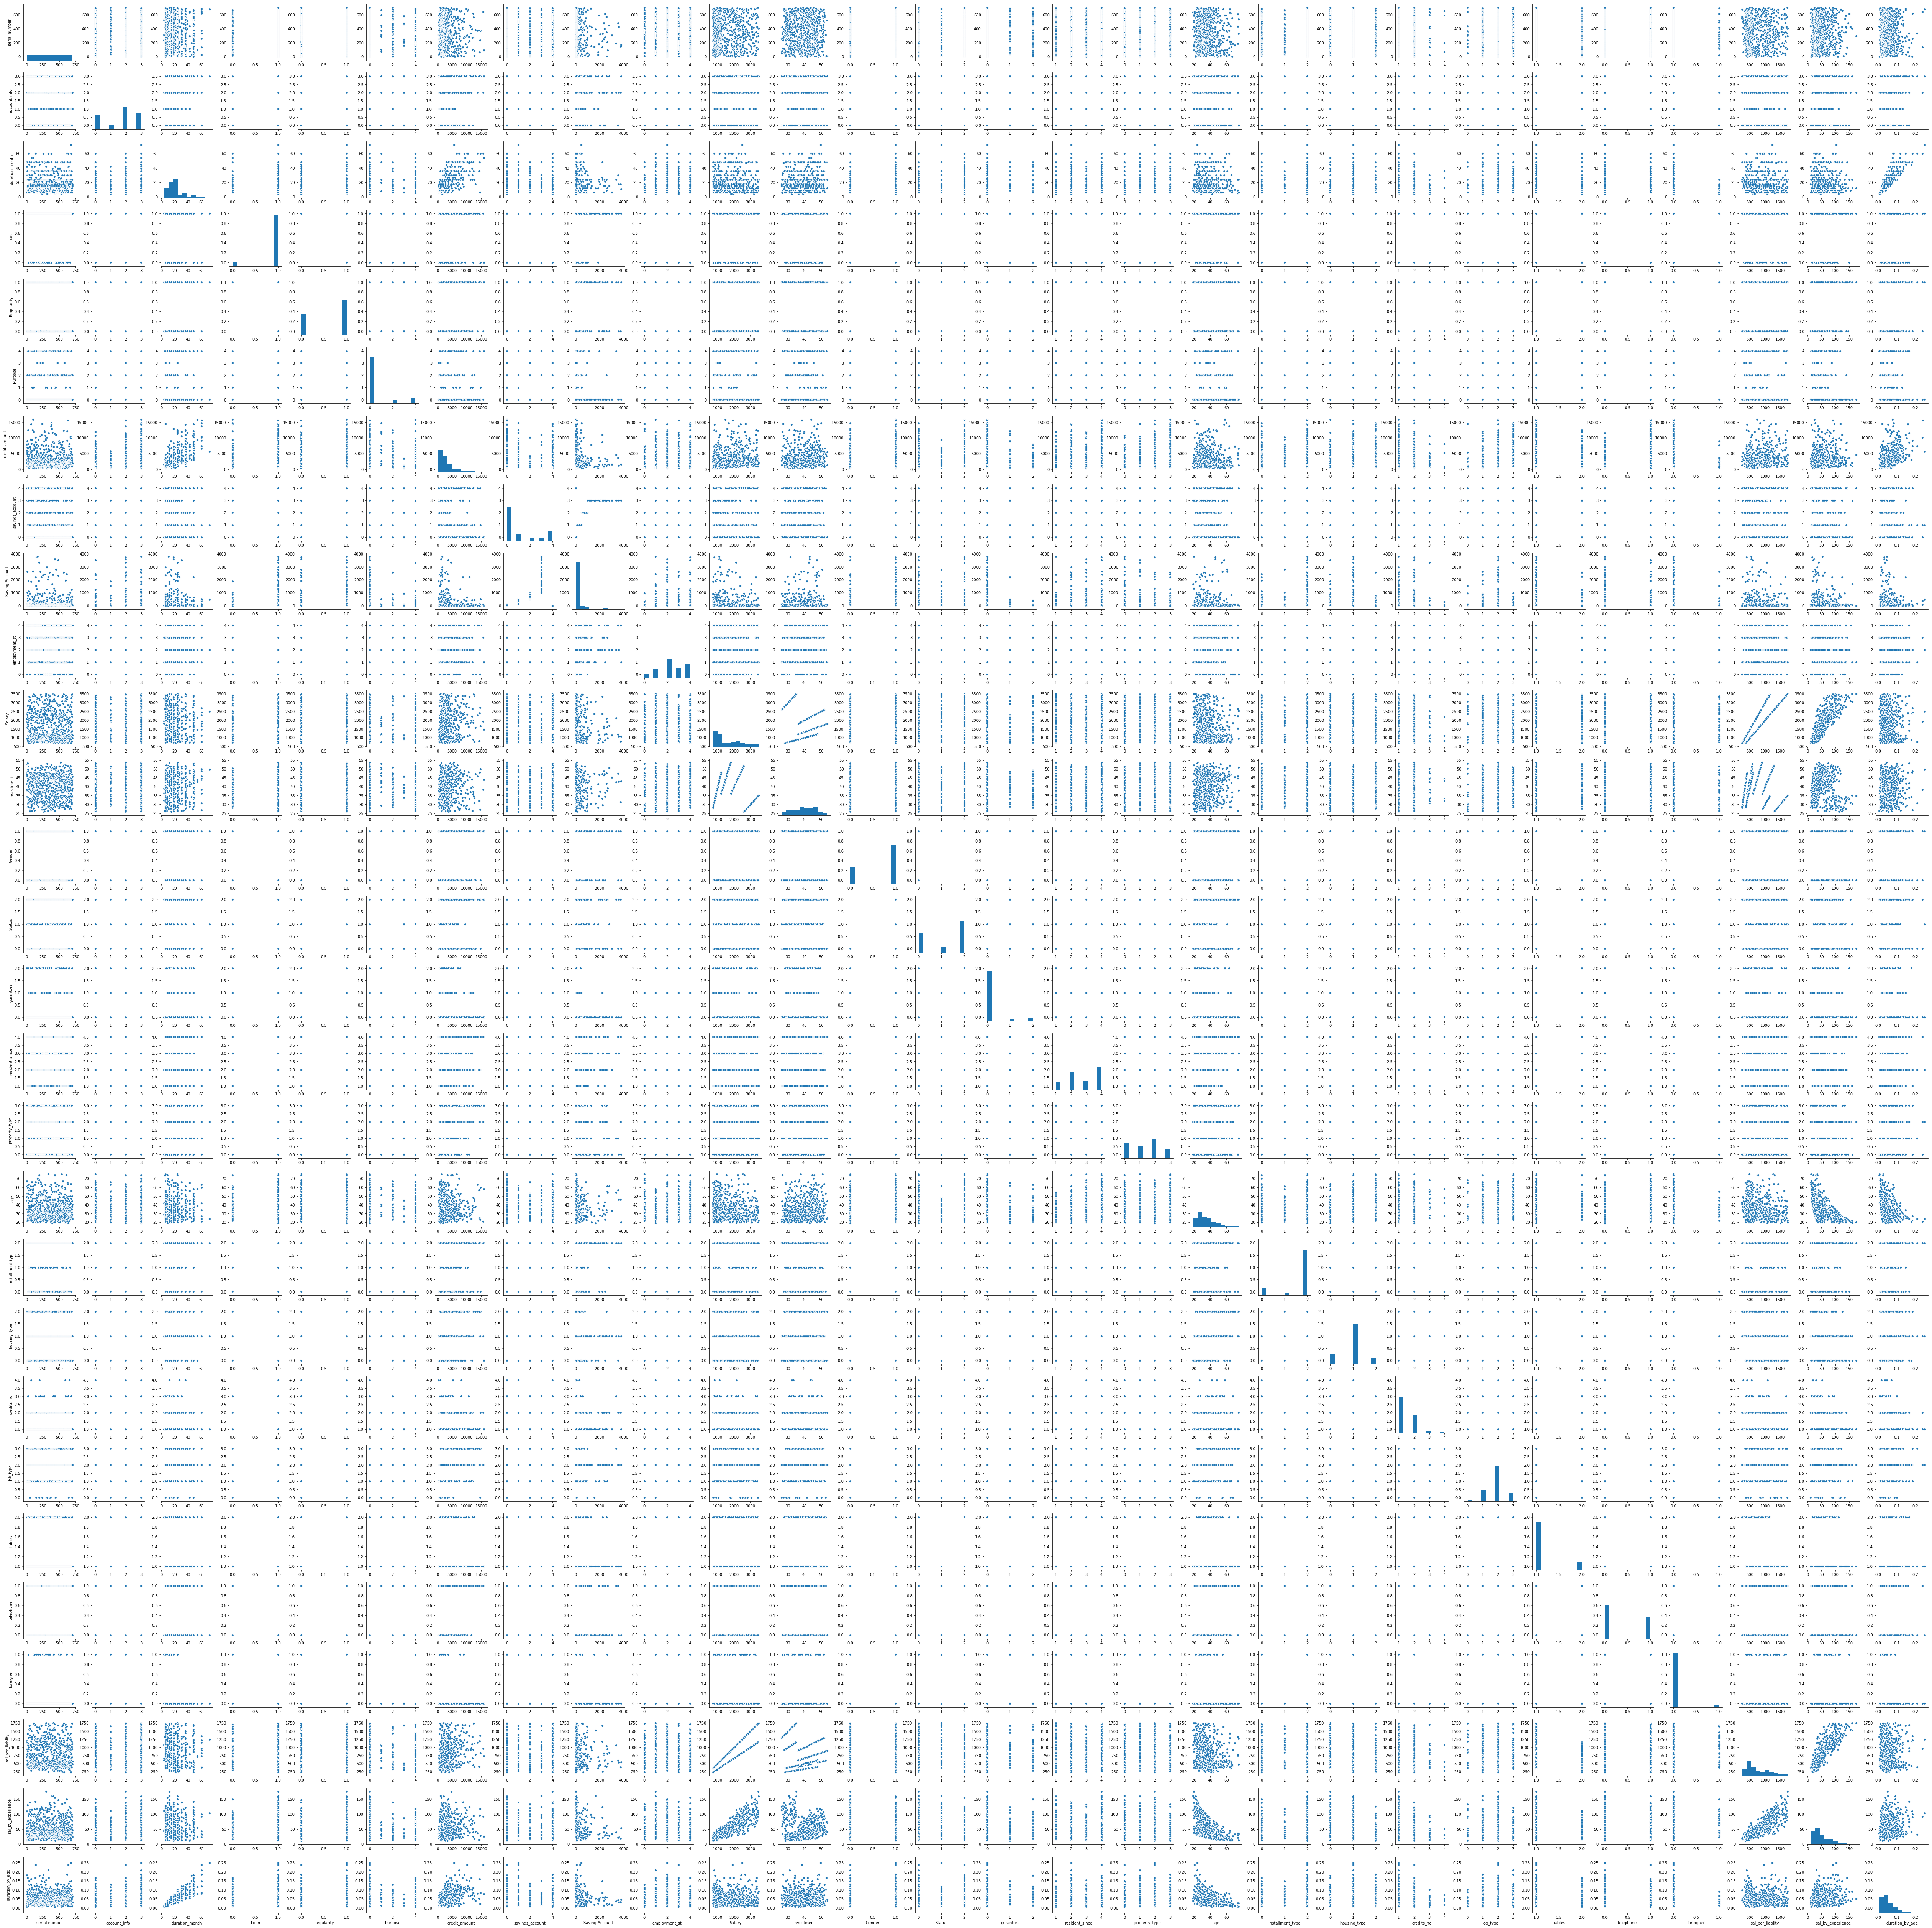

In [29]:
plt.figure(figsize=(20, 12))
sns.pairplot(train_df)
plt.show()

## Scaling the continuous features

In [30]:
#Now let me scale all the variables using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
vars = ['duration_month' , 'Saving Account', 'Salary', 'investment', 'resident_since', 'age', 'credits_no', 'liables', 'sal_per_liablity', 'sal_by_experience', 'duration_by_age']

train_df[vars] = standard_scaler.fit_transform(train_df[vars])
test_df[vars] = standard_scaler.fit_transform(test_df[vars])

train_df.drop('serial number', axis = 1, inplace = True)
x_test = test_df.drop('serial number', axis = 1)

train_df.head()

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,0,-1.194113,1,0,0,1169,4,-0.416649,4,-0.966719,...,2,1,1.061588,2,-0.417728,1,0,-0.884214,-1.239126,-1.269965
1,3,2.228616,1,1,0,5951,0,-0.280132,2,1.006857,...,2,1,-0.686910,2,-0.417728,0,0,1.156384,1.922938,3.525895
2,2,-0.705152,1,0,2,2096,0,-0.287717,3,0.596333,...,2,1,-0.686910,1,2.393903,0,0,-0.181165,-0.264935,-0.913884
3,0,1.739655,1,1,0,7882,0,-0.278236,3,0.981359,...,2,2,-0.686910,2,2.393903,0,0,0.084235,0.078939,0.664137
4,0,0.272771,1,0,0,4870,0,-0.318054,2,0.185809,...,2,2,1.061588,2,2.393903,0,0,-0.464142,-0.569285,-0.437265


## Not removing the outliers as it is deteriorating the score. Also XBBoost which is tree based model can handle the outliers on its own

In [31]:

# Let me remove outliers greater than z value of +/-2.5
from scipy import stats
import numpy as np

def remove_outliers(df_in):
    z = np.abs(stats.zscore(df_in))
    print(z)
    print(df_in.shape)
    df_in = df_in[( (z < 3.0 ).all(axis=1) ) & ( (z > -3.0 ).all(axis=1) )]
    print(df_in.shape)
    return df_in

In [32]:
# Let me split the data into test and train sets. I am going to use the test data to avoid overfitting of the model
from sklearn.cross_validation import train_test_split
#train_df = train_df.drop(['liables', 'installment_type', 'credits_no', 'Gender'], axis = 1)
train, val = train_test_split(train_df, train_size=0.95, test_size=0.05, random_state=62)
#I will remove the outliers only from the training set
#print(train.shape)
#train = remove_outliers(train)
print(train.shape)

(665, 27)


In [33]:
y_train = train['credit_amount']
x_train = train.drop ('credit_amount', axis = 1)

y_val = val['credit_amount']
x_val = val.drop ('credit_amount', axis = 1)


In [34]:
x_train.head()

,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
78,2,2.717577,0,1,0,4,-0.416649,2,0.670278,0.494811,...,2,1,-0.686910,1,2.393903,0,0,-0.130194,0.140634,1.698559
125,0,-0.705152,1,0,0,0,-0.405272,2,-0.709185,0.412212,...,2,1,1.061588,2,-0.417728,0,0,-0.617934,-0.503623,-0.558362
591,3,0.272771,1,0,0,4,-0.416649,2,-0.841777,-0.201376,...,2,0,1.061588,2,-0.417728,1,0,-0.755028,-0.914219,-0.165416
491,3,0.517251,0,1,4,0,-0.357871,4,0.583584,0.294215,...,2,2,1.061588,3,-0.417728,1,0,0.718736,-0.040844,-0.001688
545,0,0.272771,1,0,0,0,-0.310469,0,-1.137558,-1.570149,...,2,2,1.061588,2,2.393903,0,0,-1.376347,-1.108501,-0.195877


{'whiskers': [<matplotlib.lines.Line2D at 0x1eb848ebef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eb84908898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebfa72db70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebfa7cc400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eb84924320>],
 'means': []}

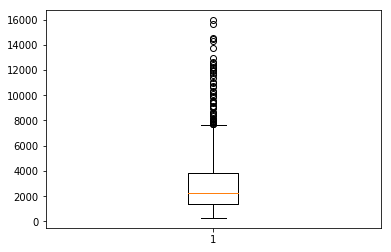

In [35]:
plt.boxplot(train['credit_amount'])

In [36]:
#xgb_baseline = XGBRegressor(learning_rate=.01,objective = 'reg:squarederror',n_estimators=2000,early_stopping_rounds=20,booster='gbtree',max_depth=5)
#xgb_baseline = XGBRFRegressor ()
xgb_baseline = XGBRegressor(learning_rate=0.02, n_estimators=2100, early_stopping_rounds=20, random_state=81)
xgb_baseline.fit(x_train, y_train, 
         eval_set=[(x_train, y_train), (x_val, y_val)],   
                 verbose = True)

[06:54:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4096.55	validation_1-rmse:4607.32
[1]	validation_0-rmse:4033.51	validation_1-rmse:4546
[2]	validation_0-rmse:3971.96	validation_1-rmse:4478.18
[3]	validation_0-rmse:3911.87	validation_1-rmse:4420.13
[4]	validation_0-rmse:3853.01	validation_1-rmse:4351.78
[5]	validation_0-rmse:3795.66	validation_1-rmse:4298.98
[6]	validation_0-rmse:3739.52	validation_1-rmse:4239.15
[7]	validation_0-rmse:3684.82	validation_1-rmse:4178.79
[8]	validation_0-rmse:3631.27	validation_1-rmse:4123.84
[9]	validation_0-rmse:3579.13	validation_1-rmse:4071.94
[10]	validation_0-rmse:3528.06	validation_1-rmse:4011.69
[11]	validation_0-rmse:3478.35	validation_1-rmse:3959.47
[12]	validation_0-rmse:3429.71	validation_1-rmse:3909.56
[13]	validation_0-rmse:3382.35	validation_1-rmse:3860.09
[14]	validation_0-rmse:3336.01	validation_1-rmse:38

[141]	validation_0-rmse:1535.62	validation_1-rmse:1602.84
[142]	validation_0-rmse:1532.42	validation_1-rmse:1600.14
[143]	validation_0-rmse:1529.95	validation_1-rmse:1594.38
[144]	validation_0-rmse:1526.13	validation_1-rmse:1589.27
[145]	validation_0-rmse:1524.1	validation_1-rmse:1583.36
[146]	validation_0-rmse:1520.44	validation_1-rmse:1578.49
[147]	validation_0-rmse:1517.85	validation_1-rmse:1575.72
[148]	validation_0-rmse:1514.32	validation_1-rmse:1571.06
[149]	validation_0-rmse:1512.37	validation_1-rmse:1566.37
[150]	validation_0-rmse:1508.72	validation_1-rmse:1561.03
[151]	validation_0-rmse:1505.37	validation_1-rmse:1556.66
[152]	validation_0-rmse:1502.98	validation_1-rmse:1556.82
[153]	validation_0-rmse:1500.74	validation_1-rmse:1554.61
[154]	validation_0-rmse:1498.58	validation_1-rmse:1552.64
[155]	validation_0-rmse:1495.41	validation_1-rmse:1553.31
[156]	validation_0-rmse:1493.17	validation_1-rmse:1553.55
[157]	validation_0-rmse:1491.09	validation_1-rmse:1551.5
[158]	validation

[283]	validation_0-rmse:1298.03	validation_1-rmse:1459.24
[284]	validation_0-rmse:1297.42	validation_1-rmse:1456.88
[285]	validation_0-rmse:1296.55	validation_1-rmse:1457.29
[286]	validation_0-rmse:1295.88	validation_1-rmse:1457.28
[287]	validation_0-rmse:1295.11	validation_1-rmse:1456.3
[288]	validation_0-rmse:1294.02	validation_1-rmse:1456.94
[289]	validation_0-rmse:1293.18	validation_1-rmse:1457.38
[290]	validation_0-rmse:1292.58	validation_1-rmse:1455.77
[291]	validation_0-rmse:1291.4	validation_1-rmse:1456.09
[292]	validation_0-rmse:1290.65	validation_1-rmse:1454.99
[293]	validation_0-rmse:1289	validation_1-rmse:1454.88
[294]	validation_0-rmse:1288.26	validation_1-rmse:1453.83
[295]	validation_0-rmse:1287.64	validation_1-rmse:1454.85
[296]	validation_0-rmse:1286.99	validation_1-rmse:1454.64
[297]	validation_0-rmse:1286.26	validation_1-rmse:1454.72
[298]	validation_0-rmse:1285.12	validation_1-rmse:1455.03
[299]	validation_0-rmse:1284.49	validation_1-rmse:1454.67
[300]	validation_0-

[425]	validation_0-rmse:1183.68	validation_1-rmse:1437.42
[426]	validation_0-rmse:1182.84	validation_1-rmse:1437.6
[427]	validation_0-rmse:1181.77	validation_1-rmse:1436.9
[428]	validation_0-rmse:1181.19	validation_1-rmse:1436.99
[429]	validation_0-rmse:1180.51	validation_1-rmse:1437.5
[430]	validation_0-rmse:1179.83	validation_1-rmse:1437.53
[431]	validation_0-rmse:1179.28	validation_1-rmse:1437.55
[432]	validation_0-rmse:1178.73	validation_1-rmse:1437.63
[433]	validation_0-rmse:1178.27	validation_1-rmse:1438.88
[434]	validation_0-rmse:1177.86	validation_1-rmse:1438.48
[435]	validation_0-rmse:1177.28	validation_1-rmse:1435.99
[436]	validation_0-rmse:1176.84	validation_1-rmse:1435.59
[437]	validation_0-rmse:1176.31	validation_1-rmse:1435.68
[438]	validation_0-rmse:1175.75	validation_1-rmse:1436.04
[439]	validation_0-rmse:1175.22	validation_1-rmse:1436.04
[440]	validation_0-rmse:1174.56	validation_1-rmse:1436.07
[441]	validation_0-rmse:1173.35	validation_1-rmse:1436.07
[442]	validation_

[567]	validation_0-rmse:1093.58	validation_1-rmse:1445.17
[568]	validation_0-rmse:1092.33	validation_1-rmse:1443.95
[569]	validation_0-rmse:1091.61	validation_1-rmse:1444.2
[570]	validation_0-rmse:1091.08	validation_1-rmse:1444.33
[571]	validation_0-rmse:1090.66	validation_1-rmse:1444.33
[572]	validation_0-rmse:1089.58	validation_1-rmse:1442.39
[573]	validation_0-rmse:1089.1	validation_1-rmse:1442.94
[574]	validation_0-rmse:1088.56	validation_1-rmse:1441.11
[575]	validation_0-rmse:1088.23	validation_1-rmse:1441.39
[576]	validation_0-rmse:1087.75	validation_1-rmse:1441.79
[577]	validation_0-rmse:1087.18	validation_1-rmse:1441.61
[578]	validation_0-rmse:1086.66	validation_1-rmse:1441.93
[579]	validation_0-rmse:1086.38	validation_1-rmse:1441.96
[580]	validation_0-rmse:1085.52	validation_1-rmse:1443.03
[581]	validation_0-rmse:1085.06	validation_1-rmse:1443.76
[582]	validation_0-rmse:1084.39	validation_1-rmse:1443.39
[583]	validation_0-rmse:1083.69	validation_1-rmse:1444.42
[584]	validation

[709]	validation_0-rmse:1026.41	validation_1-rmse:1457.23
[710]	validation_0-rmse:1025.97	validation_1-rmse:1457.09
[711]	validation_0-rmse:1025.6	validation_1-rmse:1457.34
[712]	validation_0-rmse:1025.21	validation_1-rmse:1457.95
[713]	validation_0-rmse:1024.99	validation_1-rmse:1458
[714]	validation_0-rmse:1024.85	validation_1-rmse:1458
[715]	validation_0-rmse:1024.44	validation_1-rmse:1457.92
[716]	validation_0-rmse:1024.07	validation_1-rmse:1456.8
[717]	validation_0-rmse:1023.53	validation_1-rmse:1456.42
[718]	validation_0-rmse:1023.11	validation_1-rmse:1456.28
[719]	validation_0-rmse:1022.79	validation_1-rmse:1456.29
[720]	validation_0-rmse:1022.55	validation_1-rmse:1456.33
[721]	validation_0-rmse:1021.84	validation_1-rmse:1457.04
[722]	validation_0-rmse:1021.47	validation_1-rmse:1457.57
[723]	validation_0-rmse:1021.03	validation_1-rmse:1457.95
[724]	validation_0-rmse:1020.9	validation_1-rmse:1457.95
[725]	validation_0-rmse:1020.39	validation_1-rmse:1457.62
[726]	validation_0-rmse

[851]	validation_0-rmse:964.216	validation_1-rmse:1455.72
[852]	validation_0-rmse:963.844	validation_1-rmse:1455.26
[853]	validation_0-rmse:963.345	validation_1-rmse:1456
[854]	validation_0-rmse:963.247	validation_1-rmse:1456.01
[855]	validation_0-rmse:962.774	validation_1-rmse:1456
[856]	validation_0-rmse:962.003	validation_1-rmse:1455.63
[857]	validation_0-rmse:961.907	validation_1-rmse:1455.77
[858]	validation_0-rmse:961.728	validation_1-rmse:1455.77
[859]	validation_0-rmse:960.978	validation_1-rmse:1456.06
[860]	validation_0-rmse:960.678	validation_1-rmse:1455.98
[861]	validation_0-rmse:959.93	validation_1-rmse:1455.28
[862]	validation_0-rmse:959.696	validation_1-rmse:1455.37
[863]	validation_0-rmse:959.263	validation_1-rmse:1456.3
[864]	validation_0-rmse:958.73	validation_1-rmse:1455.81
[865]	validation_0-rmse:958.265	validation_1-rmse:1456.02
[866]	validation_0-rmse:957.776	validation_1-rmse:1456.52
[867]	validation_0-rmse:957.504	validation_1-rmse:1456.61
[868]	validation_0-rmse

[993]	validation_0-rmse:903.871	validation_1-rmse:1475.95
[994]	validation_0-rmse:903.518	validation_1-rmse:1475.57
[995]	validation_0-rmse:903.283	validation_1-rmse:1475.52
[996]	validation_0-rmse:902.965	validation_1-rmse:1475.58
[997]	validation_0-rmse:902.866	validation_1-rmse:1475.58
[998]	validation_0-rmse:902.176	validation_1-rmse:1474.87
[999]	validation_0-rmse:901.747	validation_1-rmse:1475.07
[1000]	validation_0-rmse:901.399	validation_1-rmse:1475.22
[1001]	validation_0-rmse:900.848	validation_1-rmse:1476.89
[1002]	validation_0-rmse:900.61	validation_1-rmse:1477.33
[1003]	validation_0-rmse:900.407	validation_1-rmse:1477.27
[1004]	validation_0-rmse:900.133	validation_1-rmse:1477.47
[1005]	validation_0-rmse:899.815	validation_1-rmse:1476.58
[1006]	validation_0-rmse:899.718	validation_1-rmse:1476.58
[1007]	validation_0-rmse:899.103	validation_1-rmse:1476.57
[1008]	validation_0-rmse:898.872	validation_1-rmse:1476.53
[1009]	validation_0-rmse:898.257	validation_1-rmse:1476.65
[1010

[1133]	validation_0-rmse:851.239	validation_1-rmse:1491.96
[1134]	validation_0-rmse:851.059	validation_1-rmse:1491.93
[1135]	validation_0-rmse:850.704	validation_1-rmse:1492.53
[1136]	validation_0-rmse:849.877	validation_1-rmse:1493.73
[1137]	validation_0-rmse:849.67	validation_1-rmse:1493.57
[1138]	validation_0-rmse:849.233	validation_1-rmse:1494.6
[1139]	validation_0-rmse:849.021	validation_1-rmse:1494.68
[1140]	validation_0-rmse:848.472	validation_1-rmse:1494.64
[1141]	validation_0-rmse:848.232	validation_1-rmse:1494.82
[1142]	validation_0-rmse:847.542	validation_1-rmse:1495.99
[1143]	validation_0-rmse:847.366	validation_1-rmse:1495.97
[1144]	validation_0-rmse:846.84	validation_1-rmse:1496.08
[1145]	validation_0-rmse:846.329	validation_1-rmse:1496.18
[1146]	validation_0-rmse:845.927	validation_1-rmse:1496.2
[1147]	validation_0-rmse:845.411	validation_1-rmse:1496.96
[1148]	validation_0-rmse:845.24	validation_1-rmse:1496.94
[1149]	validation_0-rmse:845.04	validation_1-rmse:1496.81
[11

[1273]	validation_0-rmse:797.702	validation_1-rmse:1510.07
[1274]	validation_0-rmse:797.504	validation_1-rmse:1510.34
[1275]	validation_0-rmse:797.063	validation_1-rmse:1510.47
[1276]	validation_0-rmse:796.759	validation_1-rmse:1511.02
[1277]	validation_0-rmse:796.466	validation_1-rmse:1511.56
[1278]	validation_0-rmse:796.076	validation_1-rmse:1511.61
[1279]	validation_0-rmse:795.78	validation_1-rmse:1511.49
[1280]	validation_0-rmse:795.487	validation_1-rmse:1512.03
[1281]	validation_0-rmse:795.294	validation_1-rmse:1512.44
[1282]	validation_0-rmse:795.159	validation_1-rmse:1512.44
[1283]	validation_0-rmse:794.813	validation_1-rmse:1512.06
[1284]	validation_0-rmse:794.505	validation_1-rmse:1512
[1285]	validation_0-rmse:794.187	validation_1-rmse:1512.01
[1286]	validation_0-rmse:793.842	validation_1-rmse:1511.84
[1287]	validation_0-rmse:793.387	validation_1-rmse:1511.85
[1288]	validation_0-rmse:792.924	validation_1-rmse:1512.12
[1289]	validation_0-rmse:792.64	validation_1-rmse:1512.48
[1

[1413]	validation_0-rmse:751.617	validation_1-rmse:1529.49
[1414]	validation_0-rmse:751.438	validation_1-rmse:1529.34
[1415]	validation_0-rmse:750.595	validation_1-rmse:1529.57
[1416]	validation_0-rmse:750.046	validation_1-rmse:1530.53
[1417]	validation_0-rmse:749.638	validation_1-rmse:1530.83
[1418]	validation_0-rmse:749.25	validation_1-rmse:1530.98
[1419]	validation_0-rmse:748.846	validation_1-rmse:1531.1
[1420]	validation_0-rmse:748.519	validation_1-rmse:1531.57
[1421]	validation_0-rmse:748.124	validation_1-rmse:1531.68
[1422]	validation_0-rmse:748.049	validation_1-rmse:1531.61
[1423]	validation_0-rmse:747.799	validation_1-rmse:1531.35
[1424]	validation_0-rmse:747.263	validation_1-rmse:1530.86
[1425]	validation_0-rmse:746.905	validation_1-rmse:1530.81
[1426]	validation_0-rmse:746.815	validation_1-rmse:1530.78
[1427]	validation_0-rmse:746.604	validation_1-rmse:1530.2
[1428]	validation_0-rmse:746.265	validation_1-rmse:1530.3
[1429]	validation_0-rmse:746.146	validation_1-rmse:1530.32
[

[1553]	validation_0-rmse:706.195	validation_1-rmse:1542.36
[1554]	validation_0-rmse:705.841	validation_1-rmse:1542.35
[1555]	validation_0-rmse:705.541	validation_1-rmse:1541.59
[1556]	validation_0-rmse:705.277	validation_1-rmse:1541.24
[1557]	validation_0-rmse:704.772	validation_1-rmse:1541.43
[1558]	validation_0-rmse:704.624	validation_1-rmse:1541.58
[1559]	validation_0-rmse:704.313	validation_1-rmse:1541.81
[1560]	validation_0-rmse:704.212	validation_1-rmse:1541.8
[1561]	validation_0-rmse:704.043	validation_1-rmse:1542.01
[1562]	validation_0-rmse:703.591	validation_1-rmse:1541.28
[1563]	validation_0-rmse:703.383	validation_1-rmse:1541.37
[1564]	validation_0-rmse:703.096	validation_1-rmse:1541.55
[1565]	validation_0-rmse:702.505	validation_1-rmse:1541.24
[1566]	validation_0-rmse:702.147	validation_1-rmse:1541.81
[1567]	validation_0-rmse:701.645	validation_1-rmse:1540.77
[1568]	validation_0-rmse:701.443	validation_1-rmse:1540.83
[1569]	validation_0-rmse:701.185	validation_1-rmse:1540.4

[1693]	validation_0-rmse:665.882	validation_1-rmse:1550.45
[1694]	validation_0-rmse:665.429	validation_1-rmse:1550.4
[1695]	validation_0-rmse:665.092	validation_1-rmse:1550.65
[1696]	validation_0-rmse:664.742	validation_1-rmse:1550.45
[1697]	validation_0-rmse:664.302	validation_1-rmse:1550.39
[1698]	validation_0-rmse:664.194	validation_1-rmse:1550.5
[1699]	validation_0-rmse:663.966	validation_1-rmse:1550.78
[1700]	validation_0-rmse:663.831	validation_1-rmse:1550.78
[1701]	validation_0-rmse:663.773	validation_1-rmse:1550.75
[1702]	validation_0-rmse:663.5	validation_1-rmse:1550.83
[1703]	validation_0-rmse:663.394	validation_1-rmse:1551.07
[1704]	validation_0-rmse:663.027	validation_1-rmse:1550.75
[1705]	validation_0-rmse:662.806	validation_1-rmse:1551.03
[1706]	validation_0-rmse:662.38	validation_1-rmse:1550.97
[1707]	validation_0-rmse:662.276	validation_1-rmse:1551.08
[1708]	validation_0-rmse:662.06	validation_1-rmse:1551.09
[1709]	validation_0-rmse:661.546	validation_1-rmse:1551.33
[17

[1833]	validation_0-rmse:632.971	validation_1-rmse:1557.48
[1834]	validation_0-rmse:632.89	validation_1-rmse:1557.46
[1835]	validation_0-rmse:632.618	validation_1-rmse:1557.94
[1836]	validation_0-rmse:632.196	validation_1-rmse:1557.78
[1837]	validation_0-rmse:632.085	validation_1-rmse:1557.9
[1838]	validation_0-rmse:631.632	validation_1-rmse:1558.24
[1839]	validation_0-rmse:631.471	validation_1-rmse:1557.83
[1840]	validation_0-rmse:631.174	validation_1-rmse:1557.85
[1841]	validation_0-rmse:630.876	validation_1-rmse:1558.43
[1842]	validation_0-rmse:630.456	validation_1-rmse:1558.65
[1843]	validation_0-rmse:630.348	validation_1-rmse:1558.3
[1844]	validation_0-rmse:630.286	validation_1-rmse:1558.38
[1845]	validation_0-rmse:630.008	validation_1-rmse:1558.88
[1846]	validation_0-rmse:629.873	validation_1-rmse:1559.02
[1847]	validation_0-rmse:629.671	validation_1-rmse:1559.13
[1848]	validation_0-rmse:629.592	validation_1-rmse:1559.12
[1849]	validation_0-rmse:629.438	validation_1-rmse:1558.72


[1973]	validation_0-rmse:601.479	validation_1-rmse:1571.97
[1974]	validation_0-rmse:601.292	validation_1-rmse:1572.02
[1975]	validation_0-rmse:600.855	validation_1-rmse:1573.22
[1976]	validation_0-rmse:600.687	validation_1-rmse:1573.27
[1977]	validation_0-rmse:600.364	validation_1-rmse:1573.34
[1978]	validation_0-rmse:600.09	validation_1-rmse:1572.97
[1979]	validation_0-rmse:599.657	validation_1-rmse:1572.49
[1980]	validation_0-rmse:599.493	validation_1-rmse:1572.47
[1981]	validation_0-rmse:599.185	validation_1-rmse:1572.22
[1982]	validation_0-rmse:599.138	validation_1-rmse:1572.3
[1983]	validation_0-rmse:598.749	validation_1-rmse:1572.51
[1984]	validation_0-rmse:598.587	validation_1-rmse:1572.74
[1985]	validation_0-rmse:598.537	validation_1-rmse:1572.71
[1986]	validation_0-rmse:598.439	validation_1-rmse:1572.49
[1987]	validation_0-rmse:598.282	validation_1-rmse:1572.6
[1988]	validation_0-rmse:598.19	validation_1-rmse:1572.54
[1989]	validation_0-rmse:597.931	validation_1-rmse:1573
[199

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=20,
       gamma=0, importance_type='gain', learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=81, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

xgb_baseline = XGBRegressor(learning_rate=.0007, 
                                objective = 'reg:squarederror', 
                                n_estimators=10000, 
                                early_stopping_rounds=20,
                                booster='gbtree',
                                max_depth=6
                           )
                           
xgb_baseline.fit(x_train, y_train, 
         eval_set=[(x_train, y_train), (x_val, y_val)],   verbose = True)                           

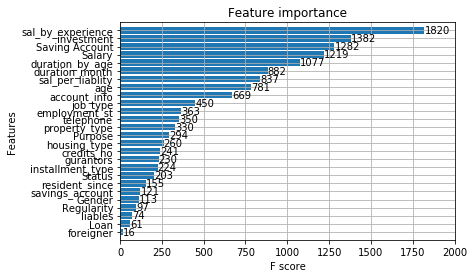

In [37]:

_ = plot_importance(xgb_baseline, height=.8)

In [38]:
test_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,...,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,sal_per_liablity,sal_by_experience,duration_by_age
0,1,2,-0.824450,1,1,0,2,0.479558,2,-0.620308,...,2,0,-0.747590,1,-0.452570,0,0,-0.510099,-0.341225,-0.599880
1,2,0,2.304173,1,0,0,0,-0.358912,4,-1.087029,...,2,2,0.951479,2,-0.452570,1,0,-0.995523,-1.139254,1.015963
2,3,1,0.218424,1,1,0,1,0.264479,4,-0.557813,...,2,2,-0.747590,2,-0.452570,1,0,-0.445099,-0.846307,-0.351364
3,4,3,0.739862,1,0,4,1,0.158620,4,-0.993951,...,1,1,0.951479,2,-0.452570,0,0,-0.898715,-1.002532,0.215924
4,5,3,0.479143,1,1,4,0,-0.362273,1,-0.947412,...,2,1,-0.747590,2,2.209605,1,0,-1.259672,-0.751536,0.503438


In [39]:
y_pred_val_xgb = xgb_baseline.predict(x_val)
r2_score(y_val, y_pred_val_xgb)

0.7342907238424505

In [40]:
test_df['credit_amount'] = xgb_baseline.predict(x_test)
test_df.rename(columns = {'serial number':'S.no'}, inplace = True)
test_df[['S.no', 'credit_amount']].to_csv('predictions.csv', index=False)

Text(0,0.5,'y pred xgboost')

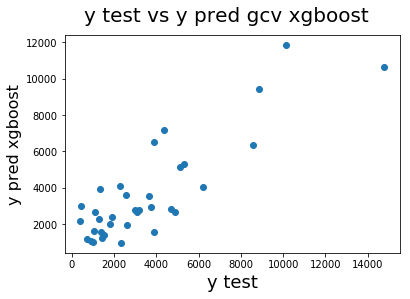

In [41]:
fig = plt.figure()
plt.scatter(y_val, y_pred_val_xgb)
fig.suptitle('y test vs y pred gcv xgboost', fontsize = 20) 
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y pred xgboost', fontsize = 16)

## Better to use GCV + XGB for realtime usage but it requires more time to tune. Commented out below section.

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

k_folds = KFold(n_splits = 4, shuffle = True, random_state = 55)
xgb = XGBRegressor(objective='reg:linear',  n_estimators=50, early_stopping_rounds=20, random_state=39)
params = {'learning_rate' : [.005, .01, .08, .3],
            'min_child_weight': [1, 5, 10],
            'gamma': [0, .5, 2, 3],
            'subsample': [.6, 0.7, 0.85],
            'colsample_bytree': [0.7, .8, .9],
            'max_depth': [3, 4, 5],
            'reg_lambda' : [1,3,5]  
        }

gcv = GridSearchCV(xgb,
                  params,
                  cv = k_folds ,
                  scoring = 'neg_mean_squared_error',
                  n_jobs = -1,
                  verbose = 30)

gcv.fit(x_train, y_train)

y_val_pred = gcv.predict(x_val)
r2_score(y_val, y_val_pred)

fig = plt.figure()
plt.scatter(y_val, y_val_pred)
fig.suptitle('y test vs y pred gcv xgboost', fontsize = 20) 
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y pred xgboost', fontsize = 16)

test_df['credit_amount'] = gcv.predict(x_test)
test_df.rename(columns = {'serial number':'S.no'}, inplace = True)
test_df[['S.no', 'credit_amount']].to_csv('predictions_gcv.csv', index=False)

print (gcv.best_params_)